In [80]:
import pandas as pd
import requests
import country_converter as coco
import numpy as np



df = pd.read_csv('merged_data.csv')

# 直接通过世界银行API获取GDP数据
def fetch_wb_gdp():
    url = "http://api.worldbank.org/v2/country/all/indicator/NY.GDP.PCAP.CD?format=json&date=2021&per_page=300"
    response = requests.get(url)
    data = response.json()

    gdp_list = []
    for item in data[1]:
        country = item['country']['value']
        gdp = item['value']
        if gdp is not None:
            gdp_list.append({
                'country': country,
                'gdp_per_capita': gdp
            })
    return pd.DataFrame(gdp_list)

gdp_data = fetch_wb_gdp()

gdp_data['country_code'] = gdp_data['country'].apply(
    lambda x: coco.convert(names=x, to='ISO2')
)


gdp_data = gdp_data.dropna(subset=['country_code'])
gdp_data = gdp_data.drop_duplicates('country_code')

# 合并到原始数据
merged_df = pd.merge(
    df,
    gdp_data[['country_code', 'gdp_per_capita']],
    on='country_code',
    how='left'
)
#缺失gdp的样本补gdp的25%分位数
merged_df["gdp_per_capita"] = merged_df["gdp_per_capita"].fillna(0)

Africa Eastern and Southern not found in regex
Africa Western and Central not found in regex
Arab World not found in regex
Caribbean small states not found in regex
Central Europe and the Baltics not found in regex
Early-demographic dividend not found in regex
East Asia & Pacific not found in regex
East Asia & Pacific ( not found in regex
East Asia & Pacific (IDA & IBRD countries) not found in regex
Euro area not found in regex
Europe & Central Asia not found in regex
Europe & Central Asia ( not found in regex
Europe & Central Asia (IDA & IBRD countries) not found in regex
European Union not found in regex
Fragile and conflict affected situations not found in regex
Heavily indebted poor countries (HIPC) not found in regex
High income not found in regex
IBRD only not found in regex
IDA & IBRD total not found in regex
IDA blend not found in regex
IDA only not found in regex
IDA total not found in regex
Late-demographic dividend not found in regex
Latin America & Caribbean not found in re

In [81]:
# 通过世界银行API获取互联网普及率数据
def fetch_internet_penetration():
    url = "http://api.worldbank.org/v2/country/all/indicator/IT.NET.USER.ZS?format=json&date=2021&per_page=300"
    response = requests.get(url)
    data = response.json()

    internet_list = []
    for item in data[1]:
        country = item['country']['value']
        internet_rate = item['value']
        if internet_rate is not None:
            internet_list.append({
                'country': country,
                'internet_penetration': internet_rate
            })
    return pd.DataFrame(internet_list)

internet_data = fetch_internet_penetration()

internet_data['country_code'] = internet_data['country'].apply(
    lambda x: coco.convert(names=x, to='ISO2')
)

internet_data = internet_data.dropna(subset=['country_code'])
internet_data = internet_data.drop_duplicates('country_code')

# 合并到原始数据
final_merged_df = pd.merge(
    merged_df,  # 使用之前合并的`merged_df`
    internet_data[['country_code', 'internet_penetration']],
    on='country_code',
    how='left'
)
final_merged_df["internet_penetration"] = final_merged_df["internet_penetration"].fillna(0)

Africa Eastern and Southern not found in regex
Africa Western and Central not found in regex
Arab World not found in regex
Caribbean small states not found in regex
Central Europe and the Baltics not found in regex
Early-demographic dividend not found in regex
East Asia & Pacific not found in regex
East Asia & Pacific ( not found in regex
East Asia & Pacific (IDA & IBRD countries) not found in regex
Euro area not found in regex
Europe & Central Asia not found in regex
Europe & Central Asia ( not found in regex
Europe & Central Asia (IDA & IBRD countries) not found in regex
European Union not found in regex
Fragile and conflict affected situations not found in regex
Heavily indebted poor countries (HIPC) not found in regex
High income not found in regex
IBRD only not found in regex
IDA & IBRD total not found in regex
IDA blend not found in regex
IDA only not found in regex
IDA total not found in regex
Late-demographic dividend not found in regex
Latin America & Caribbean not found in re

In [82]:

#country_code设置为index
final_merged_df.set_index("country_code", inplace=True)
final_merged_df

,vd,ad,X,ad_rank,Y,Z,GCI,F,gdp_per_capita,internet_penetration
country_code,,,,,,,,,,
AD,0.000000,0.000000,0.000000,77.0,69.230769,0.000,26.38,0.000000,42425.699676,93.8975
AE,1.516622,0.000000,0.005687,77.0,69.230769,53.325,98.06,3691.730769,43360.021101,100.0000
AF,0.049729,0.049729,0.000186,54.0,78.542510,50.000,5.20,3927.125506,356.496214,0.0000
AG,10.211584,0.000000,0.038293,77.0,69.230769,100.000,15.62,6923.076923,17340.379069,87.0740
AI,0.000000,0.000000,0.000000,77.0,69.230769,0.000,NaN,0.000000,0.000000,0.0000
...,...,...,...,...,...,...,...,...,...,...
YT,0.000000,0.000000,0.000000,77.0,69.230769,0.000,NaN,0.000000,0.000000,0.0000
ZA,0.421523,0.000000,0.001581,77.0,69.230769,48.000,78.46,3323.076923,6843.399419,74.1534
ZM,0.054395,0.000000,0.000204,77.0,69.230769,100.000,68.88,6923.076923,1127.160779,26.9505


In [83]:
#gdp标准化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df = final_merged_df
df["gdp_per_capita"] = scaler.fit_transform(df[["gdp_per_capita"]])

df["gdp_per_capita"] = np.log1p(df["gdp_per_capita"])  # 对GDP进行对数变换
df["GCI"] = df["GCI"].fillna(df["GCI"].quantile(0.9))
df = df.fillna(df.median())
df["vd_ad_ratio"] = df["vd"] / (df["ad"] + 1e-6)  # 添加防御/攻击密度比
df["log_X"] = np.log1p(df["X"])  # 对X进行对数变换
df["log_vd_ad_ratio"] = np.log1p(df["vd_ad_ratio"])  # 对vd_ad_ratio进行对数变换
df["log_ad"] = np.log1p(df["ad"])  # 对ad进行对数变换
df["log_vd"] = np.log1p(df["vd"])  # 对vd进行对数变换
df["log_Y"] = np.log1p(df["Y"])  # 对Y进行对数变换
df["log_Z"] = np.log1p(df["Z"])  # 对Z进行对数变换


df.describe()




,vd,ad,X,ad_rank,Y,Z,GCI,F,gdp_per_capita,internet_penetration,vd_ad_ratio,log_X,log_vd_ad_ratio,log_ad,log_vd,log_Y,log_Z
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,2.490000e+02,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,109.813902,0.252997,0.411802,65.248996,73.988261,33.299297,64.024297,2612.223794,-0.270776,51.551099,1.092510e+08,0.026415,4.119128,0.098305,0.441266,4.311314,2.263896
std,1689.938568,1.761684,6.337270,21.519174,8.712216,32.022880,35.786006,2517.034769,0.655212,36.637070,1.689973e+09,0.297658,5.879880,0.326433,0.984091,0.106917,2.041569
min,0.000000,0.000000,0.000000,1.000000,69.230769,0.000000,1.350000,0.000000,-0.870373,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,4.251787,0.000000
25%,0.000000,0.000000,0.000000,63.000000,69.230769,0.000000,26.330000,0.000000,-0.798975,10.184600,0.000000e+00,0.000000,0.000000,0.000000,0.000000,4.251787,0.000000
50%,0.054840,0.000000,0.000206,77.000000,69.230769,50.000000,80.060000,3461.538462,-0.532621,65.002200,9.999965e-01,0.000206,0.693145,0.000000,0.053389,4.251787,3.931826
75%,0.577427,0.029677,0.002165,77.000000,74.898785,54.550000,97.300000,4615.961538,0.085658,83.590400,3.199444e+04,0.002163,10.373349,0.029245,0.455795,4.329401,4.017284
max,26666.666667,25.827780,100.000000,77.000000,100.000000,100.000000,100.000000,9757.085020,2.098602,100.000000,2.666667e+10,4.615121,24.006680,3.289438,10.191207,4.615121,4.615121


In [84]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


In [85]:

features = ["GCI", "log_Z", "log_Y",   "log_X",   "ad", "vd", "vd_ad_ratio"]
target = "gdp_per_capita"


In [86]:

X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
)


rf = RandomForestRegressor(random_state=2, n_jobs=-2)

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# 参数分布
param_dist = {
    "n_estimators": randint(100, 600),
    "max_depth": randint(5,20),
    "min_samples_split": randint(2,10),
    "min_samples_leaf": randint(1, 5),
    "max_features": ["sqrt", 0.6],
    "bootstrap": [True, False]
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    scoring="r2",
    verbose=2,
    n_jobs=-2,
    random_state=42
)

random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
print("Best parameters found: ", random_search.best_params_)


# 模型评估
def evaluate(y_true, y_pred, label):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{label}评估结果：")
    print(f"- MSE: {mse:.4f}")
    print(f"- RMSE: {rmse:.4f}")
    print(f"- R²: {r2:.4f}")
    return {"MSE": mse, "RMSE": rmse, "R²": r2}

# 训练集评估
y_train_pred_1 = best_model.predict(X_train)
train_metrics = evaluate(y_train, y_train_pred_1, "训练集")

# 测试集评估
y_test_pred_1 = best_model.predict(X_test)
test_metrics = evaluate(y_test, y_test_pred_1, "测试集")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'bootstrap': False, 'max_depth': 5, 'max_features': 0.6, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 151}

训练集评估结果：
- MSE: 0.1650
- RMSE: 0.4062
- R²: 0.6132

测试集评估结果：
- MSE: 0.1738
- RMSE: 0.4169
- R²: 0.5961


Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


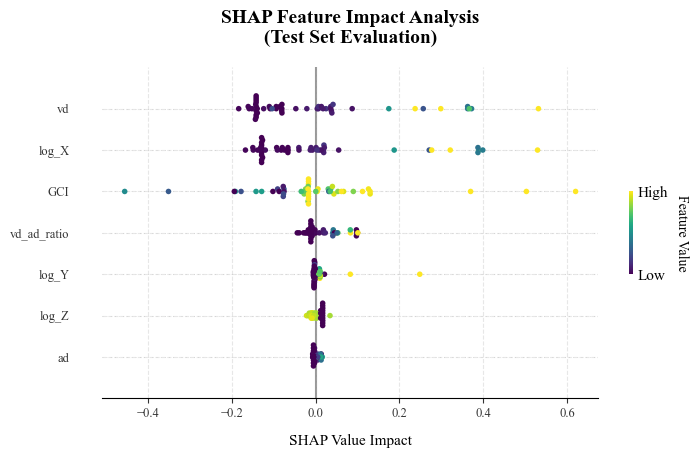

In [87]:
import shap
import matplotlib.pyplot as plt

explainer = shap.TreeExplainer(best_model)

# 计算SHAP值
shap_values = explainer(X_test)
plt.figure(figsize=(12, 8), dpi=100)


beeswarm_plot = shap.plots.beeswarm(
    shap_values,
    max_display=15,
    color=plt.get_cmap("viridis"),
    show=False
)

ax = plt.gca()

ax.set_title("SHAP Feature Impact Analysis\n(Test Set Evaluation)",
            fontsize=14, pad=18, weight='semibold')

color_bar = ax.figure.axes[-1]
color_bar.set_aspect(20)
color_bar.set_ylabel("Feature Value",
                    rotation=270,
                    labelpad=15,
                    fontsize=10)


ax.tick_params(axis='both', which='major', labelsize=9)
ax.set_xlabel("SHAP Value Impact", fontsize=11, labelpad=10)

ax.grid(True, linestyle='--', alpha=0.3, which='both')

plt.savefig(
    "shap_beeswarm_test.png",
    dpi=300,
    bbox_inches='tight',
    facecolor='white',
    edgecolor='none'
)

plt.show()

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


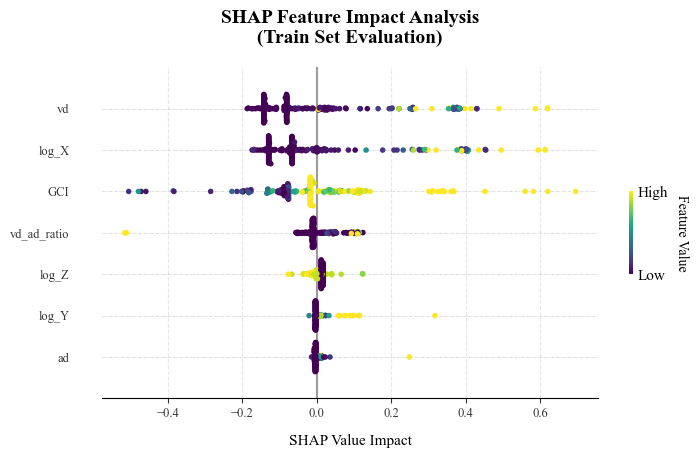

In [88]:
import shap
import matplotlib.pyplot as plt

explainer = shap.TreeExplainer(best_model)

shap_values = explainer(X_train)

plt.figure(figsize=(12, 8), dpi=100)


beeswarm_plot = shap.plots.beeswarm(
    shap_values,
    max_display=15,
    color=plt.get_cmap("viridis"),
    show=False
)

ax = plt.gca()

ax.set_title("SHAP Feature Impact Analysis\n(Train Set Evaluation)",
            fontsize=14, pad=18, weight='semibold')

color_bar = ax.figure.axes[-1]
color_bar.set_aspect(20)
color_bar.set_ylabel("Feature Value",
                    rotation=270,
                    labelpad=15,
                    fontsize=10)

ax.tick_params(axis='both', which='major', labelsize=9)
ax.set_xlabel("SHAP Value Impact", fontsize=11, labelpad=10)

ax.grid(True, linestyle='--', alpha=0.3, which='both')

plt.savefig(
    "shap_beeswarm_train.png",
    dpi=300,
    bbox_inches='tight',
    facecolor='white',
    edgecolor='none'
)

plt.show()

C:\Users\lucaslan\PycharmProjects\PythonProject\.venv\Lib\site-packages\shap\plots\_decision.py:159: UserWarning: Mismatched number of handles and labels: len(handles) = 50 len(labels) = 2
  ax.legend(handles=lines, labels=legend_labels, loc=legend_location)


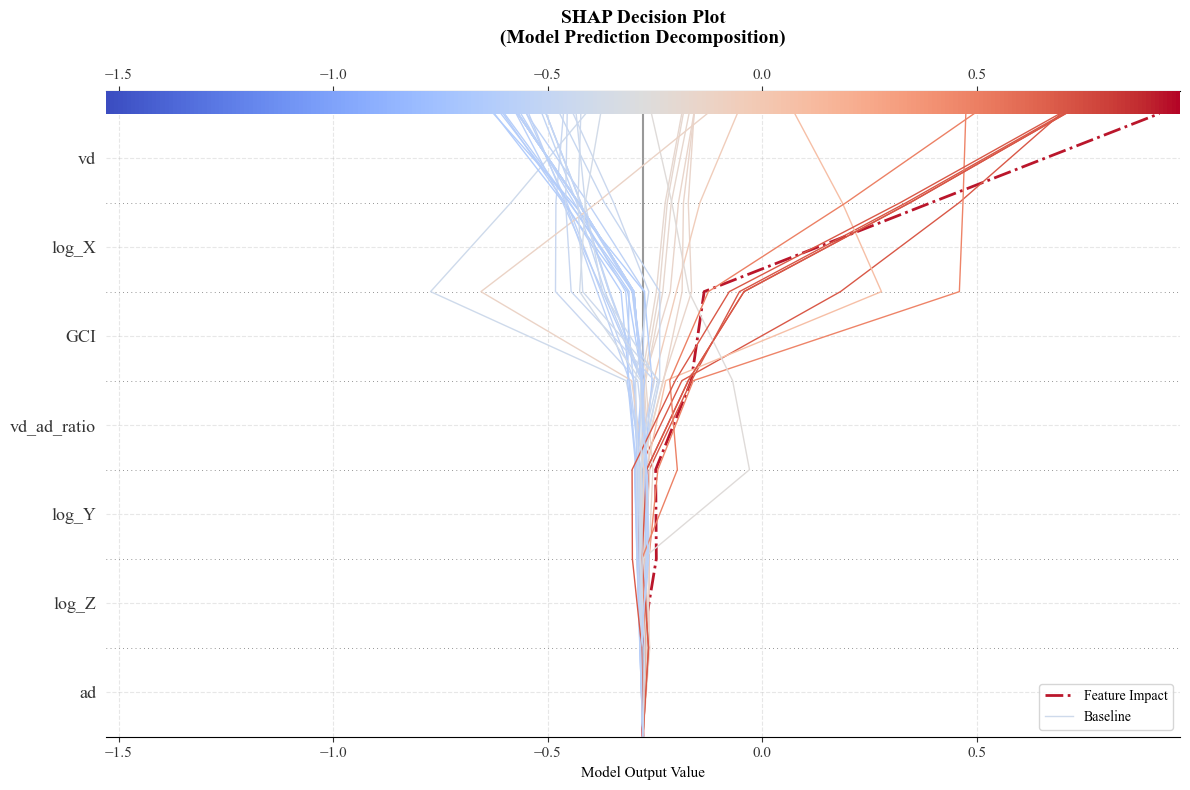

In [89]:
import shap
import matplotlib.pyplot as plt

explainer = shap.TreeExplainer(best_model)

expected_value = explainer.expected_value
shap_values = explainer.shap_values(X_test)

if isinstance(expected_value, list):
    class_idx = 1
    expected_value = expected_value[class_idx]
    shap_values = shap_values[class_idx]
elif len(shap_values.shape) == 3:
    class_idx = 0
    expected_value = explainer.expected_value[class_idx]
    shap_values = shap_values[..., class_idx]

plt.figure(figsize=(12, 8), dpi=100)

shap.decision_plot(
    base_value=expected_value,
    shap_values=shap_values,
    features=X_test,
    feature_names=features,
    feature_order='importance',  # 按重要性排序
    highlight=0,
    plot_color='coolwarm',
    legend_labels=['Feature Impact', 'Baseline'],
    legend_location='lower right',
    show=False,
    auto_size_plot=False
)

ax = plt.gca()
ax.set_title("SHAP Decision Plot\n(Model Prediction Decomposition)",
            fontsize=14, pad=18, weight='semibold')
ax.set_xlabel("Model Output Value", fontsize=11)
ax.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()

plt.savefig(
    "shap_decision_plot.png",
    dpi=300,
    bbox_inches='tight',
    facecolor='white'
)

plt.show()

In [90]:

features = ["GCI", "log_Z", "log_Y",   "log_X",   "ad", "vd", "vd_ad_ratio", "gdp_per_capita"]
target = "internet_penetration"

df["internet_penetration"] = scaler.fit_transform(df[["internet_penetration"]])
X = df[features]
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=pd.qcut(y, q=5, duplicates='drop')
)

rf = RandomForestRegressor(random_state=2, n_jobs=-2)

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


param_dist = {
    "n_estimators": randint(100, 200),
    "max_depth": randint(1, 8),
    "min_samples_split": randint(2,10),
    "min_samples_leaf": randint(1, 5),
    "max_features": ["sqrt", 0.6],
    "bootstrap": [True, False]
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=1000,
    cv=5,

    scoring="r2",
    verbose=2,
    n_jobs=-2,
    random_state=42
)

random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
print("Best parameters found: ", random_search.best_params_)

def evaluate(y_true, y_pred, label):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{label}评估结果：")
    print(f"- MSE: {mse:.4f}")
    print(f"- RMSE: {rmse:.4f}")
    print(f"- R²: {r2:.4f}")
    return {"MSE": mse, "RMSE": rmse, "R²": r2}

# 训练集评估
y_train_pred_2 = best_model.predict(X_train)
train_metrics = evaluate(y_train, y_train_pred_2, "训练集")

# 测试集评估
y_test_pred_2 = best_model.predict(X_test)
test_metrics = evaluate(y_test, y_test_pred_2, "测试集")

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Best parameters found:  {'bootstrap': True, 'max_depth': 7, 'max_features': 0.6, 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 129}

训练集评估结果：
- MSE: 0.1149
- RMSE: 0.3389
- R²: 0.8863

测试集评估结果：
- MSE: 0.1604
- RMSE: 0.4004
- R²: 0.8323


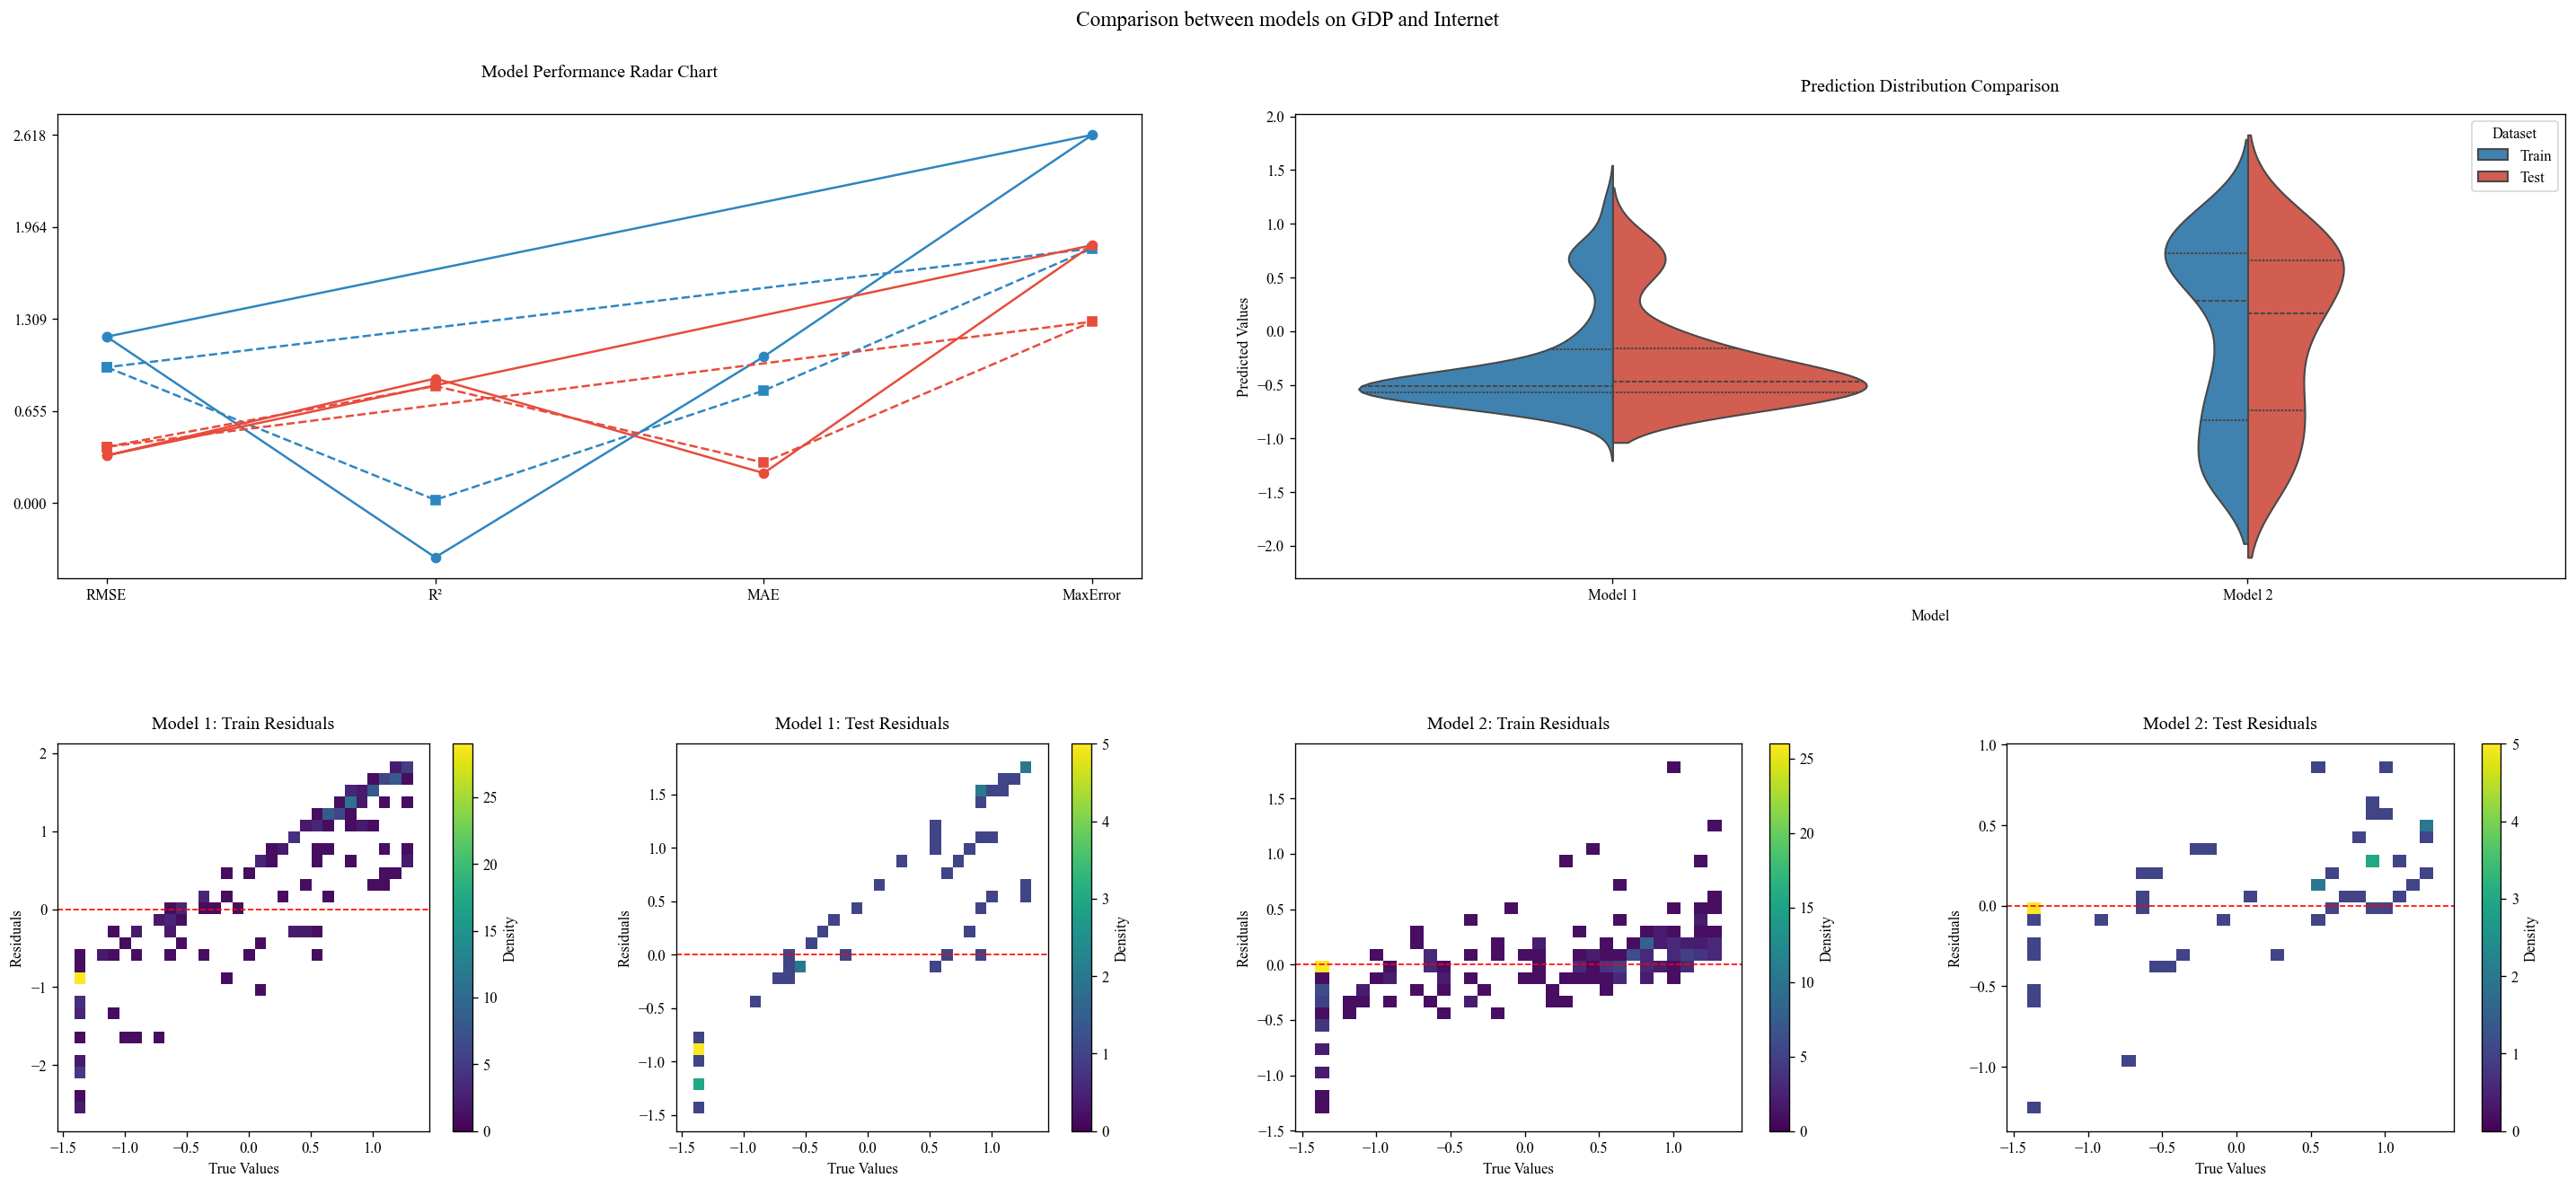

In [99]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.gridspec import GridSpec
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, max_error


# X_train, y_train: Full training features and labels
# X_test, y_test: Full test features and labels
# y_train_pred_1, y_test_pred_1: Model 1 predictions
# y_train_pred_2, y_test_pred_2: Model 2 predictions

def calculate_metrics(y_true, y_pred):
    return {
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'R²': r2_score(y_true, y_pred),
        'MAE': mean_absolute_error(y_true, y_pred),
        'MaxError': max_error(y_true, y_pred)
    }

metrics = {
    'Model 1': {
        'Train': calculate_metrics(y_train, y_train_pred_1),
        'Test': calculate_metrics(y_test, y_test_pred_1)
    },
    'Model 2': {
        'Train': calculate_metrics(y_train, y_train_pred_2),
        'Test': calculate_metrics(y_test, y_test_pred_2)
    }
}

plt.figure(figsize=(24, 16), dpi=120)
gs = GridSpec(3, 4, height_ratios=[1.2, 1, 1], width_ratios=[1,1,1.2,1.2])
plt.rcParams.update({
    'font.size': 10,
    'font.family': 'Times New Roman',
    'axes.titlesize': 12,
    'axes.labelsize': 10
})
model_colors = {'Model 1': '#2E86C1', 'Model 2': '#E74C3C'}
dataset_styles = {'Train': {'ls': '-', 'marker': 'o'},
                 'Test': {'ls': '--', 'marker': 's'}}

# ================= Figure 1: Radar Chart =================
ax1 = plt.subplot(gs[0, :2])
categories = ['RMSE', 'R²', 'MAE', 'MaxError']
angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False).tolist()

for model, color in model_colors.items():
    # Training metrics
    train_values = [metrics[model]['Train'][m] for m in categories] + [metrics[model]['Train'][categories[0]]]
    ax1.plot(angles + angles[:1], train_values, color=color, **dataset_styles['Train'],
            label=f'{model} Train')

    # Testing metrics
    test_values = [metrics[model]['Test'][m] for m in categories] + [metrics[model]['Test'][categories[0]]]
    ax1.plot(angles + angles[:1], test_values, color=color, **dataset_styles['Test'],
            label=f'{model} Test')

ax1.set_xticks(angles)
ax1.set_xticklabels(categories)
ax1.set_yticks(np.linspace(0, max([metrics[m][d][c] for m in metrics for d in ['Train','Test'] for c in categories]), 5))
ax1.set_title("Model Performance Radar Chart", pad=25)
ax1.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# ================= Figure 2: Prediction Distribution =================
ax2 = plt.subplot(gs[0, 2:])
data = []
for model in ['Model 1', 'Model 2']:
    pred_train = eval(f'y_train_pred_{model[-1]}')
    pred_test = eval(f'y_test_pred_{model[-1]}')
    data.extend([(model, 'Train', p) for p in pred_train] +
                [(model, 'Test', p) for p in pred_test])

import pandas as pd
df = pd.DataFrame(data, columns=['Model', 'Dataset', 'Prediction'])
sns.violinplot(x='Model', y='Prediction', hue='Dataset', data=df,
               palette={'Train': '#2E86C1', 'Test': '#E74C3C'},
               split=True, inner="quartile", ax=ax2)
ax2.set_xlabel("Model")
ax2.set_ylabel("Predicted Values")
ax2.set_title("Prediction Distribution Comparison", pad=15)

# ================= Figures 3-6: Residual Heatmaps =================
def plot_residual_heatmap(ax, y_true, y_pred, title):
    residuals = y_true - y_pred
    sns.histplot(x=y_true, y=residuals, ax=ax,
                 cmap="viridis", cbar=True, bins=30,
                 cbar_kws={'label': 'Density'})
    ax.axhline(0, color='red', linestyle='--', lw=1)
    ax.set_title(title, pad=10)
    ax.set_xlabel("True Values")
    ax.set_ylabel("Residuals")

# Model 1 Train Residuals
ax3 = plt.subplot(gs[1, 0])
plot_residual_heatmap(ax3, y_train, y_train_pred_1, "Model 1: Train Residuals")

# Model 1 Test Residuals
ax4 = plt.subplot(gs[1, 1])
plot_residual_heatmap(ax4, y_test, y_test_pred_1, "Model 1: Test Residuals")

# Model 2 Train Residuals
ax5 = plt.subplot(gs[1, 2])
plot_residual_heatmap(ax5, y_train, y_train_pred_2, "Model 2: Train Residuals")

# Model 2 Test Residuals
ax6 = plt.subplot(gs[1, 3])
plot_residual_heatmap(ax6, y_test, y_test_pred_2, "Model 2: Test Residuals")

plt.tight_layout()
plt.subplots_adjust(top=0.92, hspace=0.4, wspace=0.3)
plt.suptitle("Comparison between models on GDP and Internet", fontsize=14, y=0.98)
plt.savefig("COMP.png", dpi=300, bbox_inches='tight')
plt.show()
